### Import

In [1]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../../")
import bayseg
sys.path.append("../tests/")

### Create test data

In [12]:
import create_testing_data
observations, latent_2d = create_testing_data.create_2d_data(100, 100)

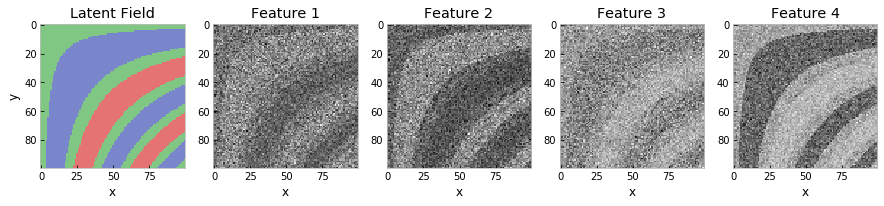

In [13]:
fig, ax = plt.subplots(ncols=5, figsize=(15, 7))
for i in range(4 + 1):
    if i == 0:
        ax[i].imshow(latent_2d, interpolation="nearest", cmap=bayseg.cmap, norm=bayseg.cmap_norm)
        ax[i].set_ylabel("y")
        ax[i].set_title("Latent Field")
    else:
        ax[i].imshow(observations[:, :, i - 1], interpolation="nearest", cmap="gray")
        ax[i].set_title("Feature " + str(i))
    ax[i].grid(False)
    ax[i].set_xlabel("x")

plt.show()

In [11]:
observations.shape

(100, 100, 4)

### Fit

In [14]:
clf = bayseg.BaySeg(observations, 3, beta_init=1)

In [15]:
clf.fit(100, beta_jump_length=0.01, 
        verbose=False, fix_beta=False)

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.56it/s]


In [17]:
betas = np.array(clf.betas)

In [20]:
betas.shape

(101, 4)

In [19]:
betas[:,0]

array([ 1.        ,  1.09906132,  1.09906132,  1.16339689,  1.16339689,
        1.16339689,  1.16339689,  1.16339689,  1.20841356,  1.20841356,
        1.20841356,  1.34154334,  1.34154334,  1.41619111,  1.46808622,
        1.32100851,  1.32100851,  1.32100851,  1.32100851,  1.31806308,
        1.27076794,  1.27076794,  1.27076794,  1.46942355,  1.46942355,
        1.43499814,  1.38937907,  1.37413302,  1.37413302,  1.3803992 ,
        1.44553765,  1.39181748,  1.33903267,  1.33903267,  1.33903267,
        1.33903267,  1.3423099 ,  1.3423099 ,  1.3423099 ,  1.3423099 ,
        1.3423099 ,  1.3621831 ,  1.47157611,  1.47157611,  1.38051895,
        1.38051895,  1.56145153,  1.54971794,  1.50818089,  1.53685616,
        1.53685616,  1.7825166 ,  1.78799801,  1.78799801,  1.77211523,
        1.85743046,  1.96694818,  1.86307054,  1.8950378 ,  1.97870947,
        1.88903021,  1.88903021,  2.0043476 ,  2.04390139,  1.88937067,
        1.90969494,  2.09275774,  2.15590196,  2.06800927,  2.02

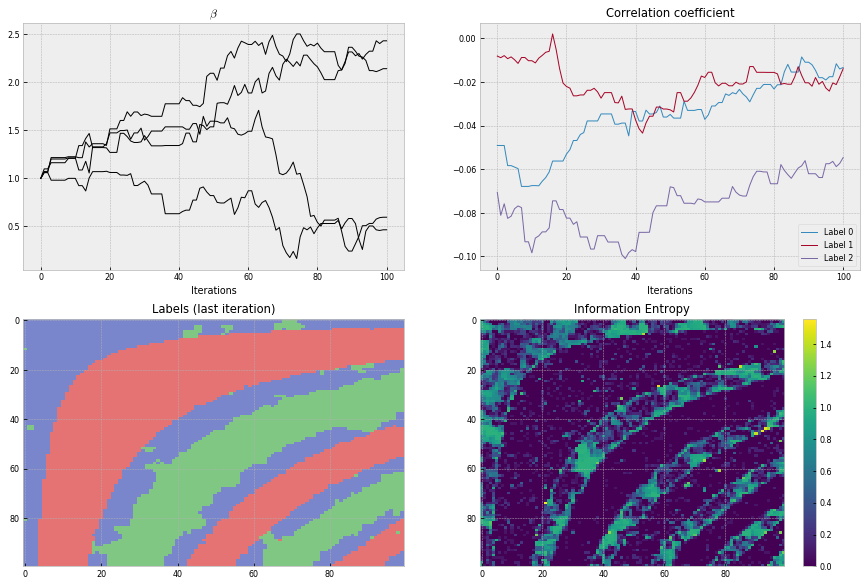

In [22]:
clf.diagnostics_plot()

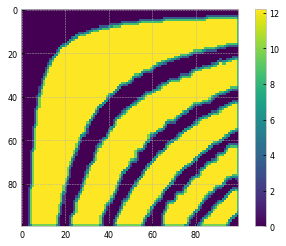

In [8]:
fig = plt.imshow(clf.storage_gibbs_e[-1][:,0].reshape(100,100))
plt.colorbar(fig)

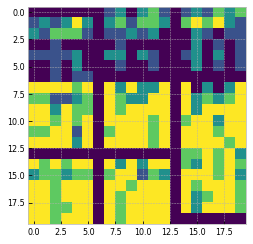

In [16]:
plt.imshow(clf.storage_gibbs_e[-1][:,1].reshape(20,20))

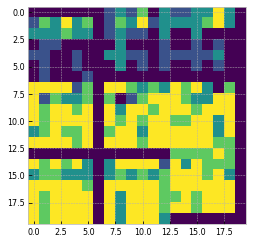

In [19]:
plt.imshow(clf.storage_gibbs_e[-1][:,2].reshape(20,20))

---

# Testing

In [2]:
import pandas as pd

In [3]:
f1 = pd.read_csv("../../data/2d_anisotropic_mrf/feature_1", header=None).values
f2 = pd.read_csv("../../data/2d_anisotropic_mrf/feature_2", header=None).values

In [4]:
lf = pd.read_csv("../../data/2d_anisotropic_mrf/latent_field", header=None).values

In [5]:
obs = np.zeros((2,100,100))

In [6]:
obs[0,:,:] = f1
obs[1,:,:] = f2
obs = obs.T

In [16]:
np.random.seed(10)
clf = bayseg.BaySeg(obs, 3, beta_init=1)

In [26]:
np.random.seed(10)
clf.fit(25, beta_jump_length=0.1)

100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 13.31it/s]


In [19]:
np.random.seed(10)
clf2 = bayseg.BaySeg(obs, 3, beta_init=1)

In [20]:
np.random.seed(10)
clf2.fit(25, beta_jump_length=0.1)

100%|███████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 13.50it/s]


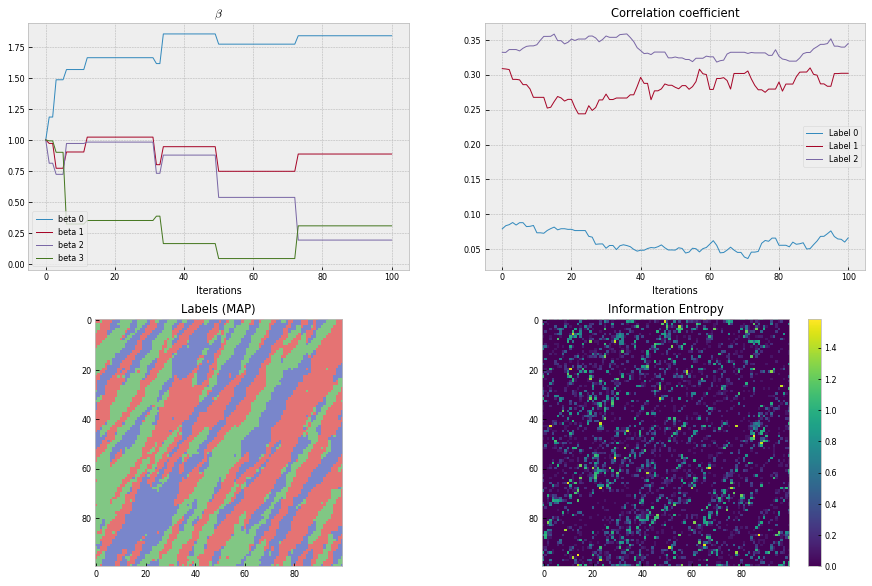

In [27]:
clf.diagnostics_plot()

In [29]:
np.save?

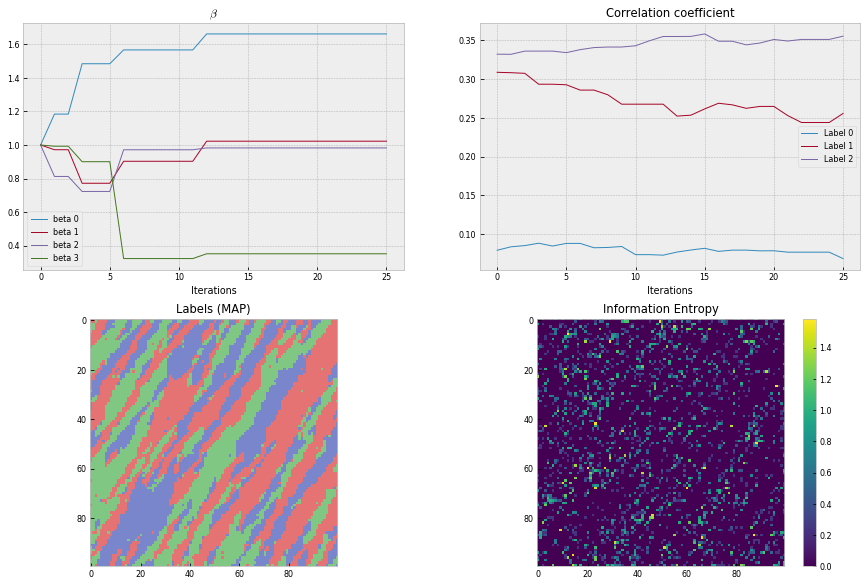

In [28]:
clf2.diagnostics_plot()

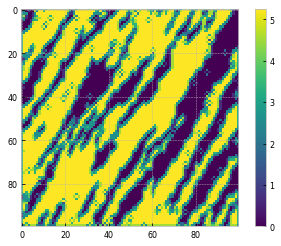

In [51]:
fig = plt.imshow(clf.storage_gibbs_e[-1][:,1].reshape(100,100))
plt.colorbar(fig)

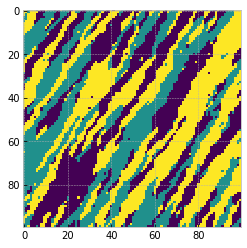

In [10]:
plt.imshow(lf.T)

In [36]:
(3 * 0.675)**(1/2)

1.4230249470757708

In [10]:
np.random.seed(10)
np.random.rand()

0.771320643266746

In [9]:
np.random.seed(10)
np.random.rand()

0.771320643266746